In [1]:
import os
import time
import shutil
import contextlib
import numpy as np
import matplotlib.pyplot as plt


from helper import *
from models import *
from solvers.euler import *
from solvers.rk_solvers import *

from IPython.utils import io
from data_generator import *

print(f"Your machine has {os.cpu_count()} cores.")

Your machine has 8 cores.


This is used to generate data from the models (stored in `models.py`). You can speed up the generation process by increasing the `cores` argument to take advantage of `multiprocessing`. The following context manager is taken from [StackOverflow](https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print#:~:text=If%20you%20don%27t%20want,the%20top%20of%20the%20file.) to prevent printing but it does not work, as the printing comes from functions in other files

In [14]:
start = time.time()
with io.capture_output() as captured:
    total = generateData(model4,
            num_data = 10,
            init_sty = 'random',
            times = (0, 20),
            params = {'no. of prey': 100, 
        'kappa for prey': 0.5, 
        'attraction of prey a': 0, 
        'repulsion of prey b_1': 0.15, 
        'repulsion of pred b_2': 0.55,
        'p1 spotted': 0.8,
        'p2 not spotted':0.4,
        'angle_prey': np.cos(np.pi / 3),
        'angle_pred': np.cos(np.pi / 2.5), 
        'num_neighbours': 5,
        'attraction of pred c': 10, 
        'exponent of dist pred p': 3},
            steps = 1000,
            second_order = False,
            method = 'rk2',
            return_vel = False,
            cores = 8)
end = time.time()
print(f"Time taken: {end-start} seconds.")

/Users/customer/projects/Summer2022UROP/models.py:246: RuntimeWarning: invalid value encountered in true_divide
  mask_hh = (dot_prod_h / abs_val_h)>=a_h # (N,N-1,1)
/Users/customer/projects/Summer2022UROP/models.py:262: RuntimeWarning: invalid value encountered in true_divide
  mask_hp = (np.sum(vprey*(pprey-ppred), axis = 1)[:,np.newaxis] / (norm_pred * np.linalg.norm(vprey)))>=a_h
/Users/customer/projects/Summer2022UROP/models.py:246: RuntimeWarning: invalid value encountered in true_divide
  mask_hh = (dot_prod_h / abs_val_h)>=a_h # (N,N-1,1)
/Users/customer/projects/Summer2022UROP/models.py:262: RuntimeWarning: invalid value encountered in true_divide
  mask_hp = (np.sum(vprey*(pprey-ppred), axis = 1)[:,np.newaxis] / (norm_pred * np.linalg.norm(vprey)))>=a_h
/Users/customer/projects/Summer2022UROP/models.py:246: RuntimeWarning: invalid value encountered in true_divide
  mask_hh = (dot_prod_h / abs_val_h)>=a_h # (N,N-1,1)
/Users/customer/projects/Summer2022UROP/models.py:262: Runti

Time taken: 8.373240232467651 seconds.


Check the output

In [5]:
total = list(total)

In [10]:
total[0][1].shape

(1000, 201, 2)

You are using just the positions.


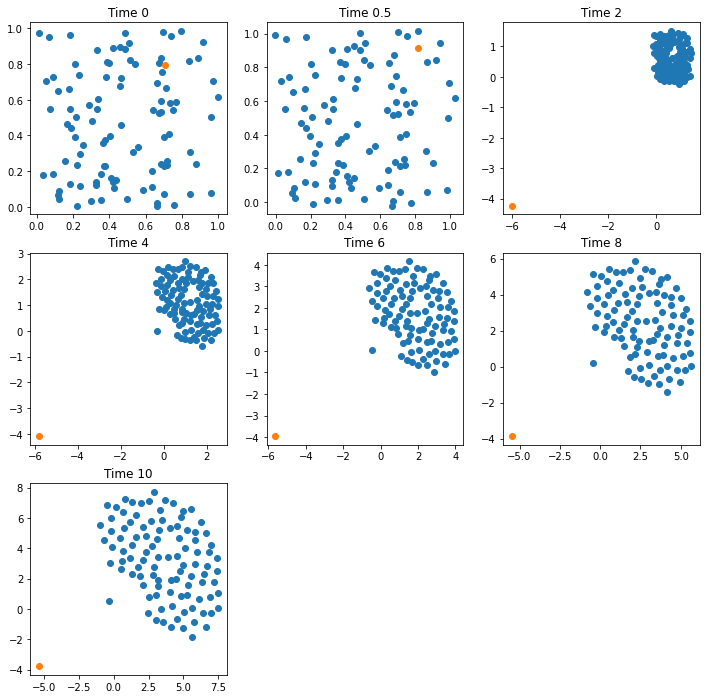

In [11]:
multiPlot([total[0][1], 20/1000, 100], sample_points =[0,0.5,2,4,6,8,10],
            axis_lim = None, second_order = False, quiver=True)

The next steps are to create datasets from those objects